# Ujian Tengah Semester
## Tahap Analisa
data diambil dari : https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1

### Pemahaman Data (Data Understanding)
Tahap ini bertujuan untuk memahami struktur, isi, dan karakteristik dari dataset sebelum dilakukan preprocessing dan pemodelan.

Memahami data dalam penambangan data (data mining) adalah proses menganalisis dan mengeksplorasi data untuk menemukan pola, hubungan, dan informasi yang berguna. Penambangan data melibatkan berbagai teknik dan metode untuk mengolah data besar (big data) dan menghasilkan wawasan yang dapat digunakan untuk pengambilan keputusan yang lebih baik.

*Beberapa kegiatan  dalam memahami diantaranya adalah :*  

1. Pengumpulan data  
2. Sampling : mengambil data sebagian untuk menarik kesimpulan.  
3. Profiling data : mengamati data, tipe data, kategori dan tingkatannya, memprofiling data bahwa data tersebut ordinal, mencatat apakah data tersebut berkualitas.    
4. Korelasi dan Asosiasi : menganalisis hubungan antar kolom.  
5. Eksplorasi data : Menggunakan teknik visualisasi seperti diagram batang, scatter plot, atau histogram untuk memahami distribusi data.  
6. Identifikasi masalah data : Menemukan data yang tidak valid, duplikat, atau tidak konsisten.  
7. Validasi data : sumber datanya jelas.  

*Pengumpulan Data*  
*   Mengumpulkan data dari berbagai sumber, seperti database, file CSV, API, atau sensor.  
*   Memastikan bahwa semua data yang relevan telah dikumpulkan sesuai tujuan analisis.  

*Visualisasi Data*  
*  Histogram : untuk melihat distribusi data numerik  
*  Box plot : untuk mmendeteksi outlierts  
*  Scatter plot : hubungan antara 2 variabel  
*  Bar chart/Pie chart.  

*identifikasi masalah data :*  
1. missing values : menemukan data yang hilang atau tidak lengkap  
2. outliers : mendeteksi nilai nilai ekstrem yang mungkin melakukan kesalahan atau anomali  
3. duplikasi data : mengidentifikasi baris atau entri yang duplikat  
4. inkonsistensi : memeriksa apakah ada ketidaksesuaian dalam format atau nilai data.  

*manfaat data understanding :*  
1. meningkatkan kualitas data  
2. menghemat waktu dan biaya : menghindari kesalahan analisis yang disebabkan oleh data buruk  
3. mendukung pengambilan keputusan : memberikan wawasan awal yang berguna untuk merumuskan strategi analisis  
4. mengurangi resiko kesalahan model.

### Pra-pemrosesan Data (Preprocessing)

Tahapan ini bertujuan untuk membersihkan dan menyiapkan data agar bisa digunakan oleh model klasifikasi secara optimal.

In [1]:
import pandas as pd

In [2]:
# Baca data dari CSV
df = pd.read_csv("cirrhosis.csv")

# Tampilkan beberapa baris pertama
print(df.head())

   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2  

### Visualisasi

Visualisasi ini memberikan gambaran menyeluruh terhadap karakteristik pasien sirosis.

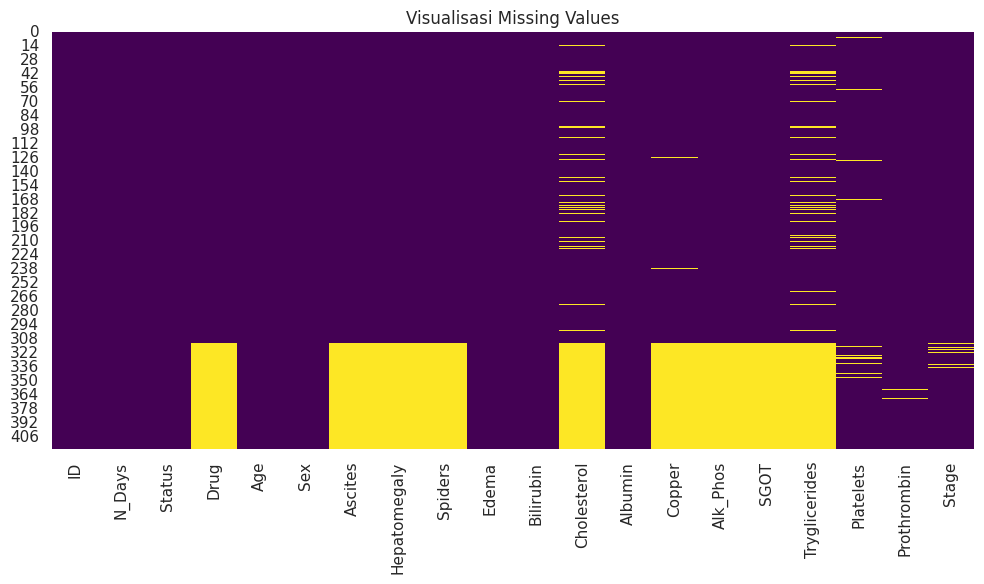

/tmp/ipykernel_5258/2164455548.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stage', palette="Set2")


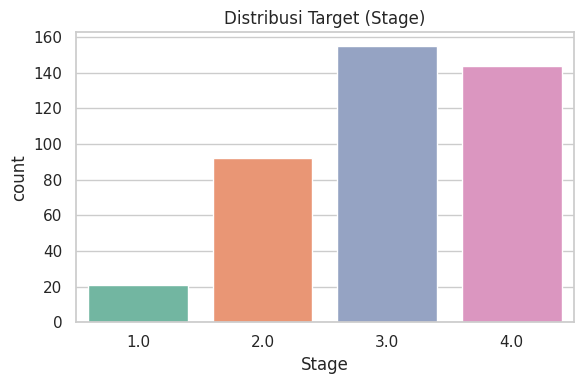

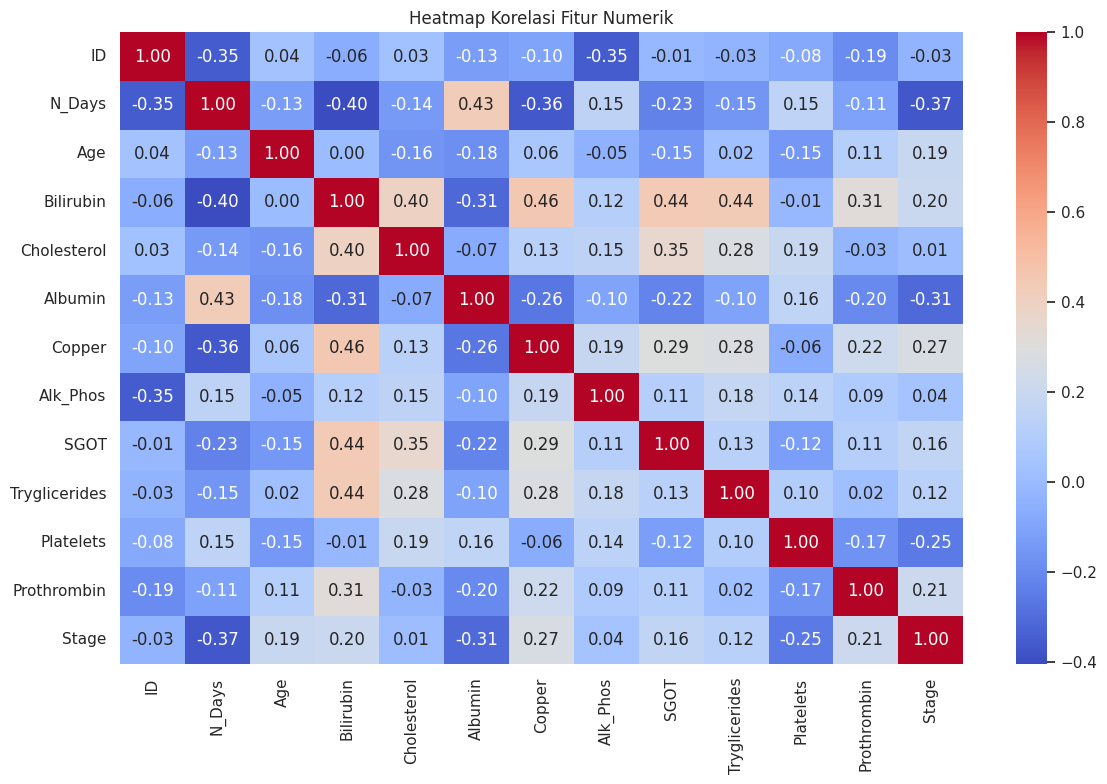

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data
df = pd.read_csv("cirrhosis.csv")

# Set style seaborn
sns.set(style="whitegrid")

# Visualisasi Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.tight_layout()
plt.show()

# Visualisasi distribusi target (jika kolom 'Stage' ada)
if 'Stage' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='Stage', palette="Set2")
    plt.title("Distribusi Target (Stage)")
    plt.tight_layout()
    plt.show()

# Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

In [4]:
# Baca dataset
file_path = "cirrhosis.csv"
df = pd.read_csv(file_path)

# Informasi umum dataset
print("📌 Info Dataset:")
print(df.info())

# Statistik deskriptif untuk data numerik
print("\n📊 Statistik Deskriptif:")
print(df.describe())

# Frekuensi kemunculan untuk variabel kategorikal
print("\n📈 Frekuensi Variabel Kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n", df[col].value_counts())

📌 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64

### LOF untuk mendeteksi outlier

Mendeteksi outlier atau anomali pada data pasien sirosis menggunakan algoritma Local Outlier Factor (LOF). LOF mengukur seberapa jauh kepadatan suatu data berbeda dari tetangganya, sehingga efektif untuk mengenali pasien dengan kondisi yang tidak umum atau berisiko tinggi.

In [5]:
%pip install ace_tools


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# 1. Load dataset
df = pd.read_csv('cirrhosis.csv')

# 2. Pilih kolom sesuai header yang diberikan
cols = [
    "ID", "N_Days", "Status", "Drug", "Age", "Sex",
    "Ascites", "Hepatomegaly", "Spiders", "Edema",
    "Bilirubin", "Cholesterol", "Albumin", "Copper",
    "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
df_subset = df[cols]

# 3. Dari subset, pilih kolom numerik untuk LOF
numeric_cols = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin",
    "Copper", "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
X = df_subset[numeric_cols]

# 4. Imputasi nilai NaN dengan rata-rata kolom
X_imputed = X.fillna(X.mean())

# 5. Inisiasi dan fit model LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_imputed)
scores = lof.negative_outlier_factor_

# 6. Tambahkan hasil ke DataFrame subset
df_subset['LOF_score'] = scores
df_subset['is_outlier'] = (y_pred == -1)

# 7. Filter hanya baris outlier dan urutkan berdasarkan skor
outliers = df_subset[df_subset['is_outlier']].sort_values('LOF_score')

# 8. Tampilkan hasil
print("Detected outliers:")
print(outliers)

Detected outliers:
      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
29    30     321      D          Placebo  15116   F       N            Y   
52    53    1000      D  D-penicillamine  24621   F       N            Y   
28    29    4509      C          Placebo  23331   F       N            N   
36    37     223      D  D-penicillamine  22546   F       Y            Y   
55    56    1847      D          Placebo  12279   F       N            Y   
23    24    4079      D  D-penicillamine  16261   M       N            Y   
205  206    2255      C  D-penicillamine  22642   F       N            N   
53    54    1434      D  D-penicillamine  14317   F       Y            Y   
42    43    4556      C  D-penicillamine  17850   F       N            N   
304  305    1216      C          Placebo  15730   F       N            Y   
57    58    4459      C  D-penicillamine  16279   M       N            N   
58    59    2224      D  D-penicillamine  14754   F       N          

### K-NN untuk mendeteksi outlier

Mengklasifikasi data pasien sirosis menggunakan algoritma K-Nearest Neighbors (K-NN). Model ini menentukan status pasien berdasarkan kedekatan data dengan tetangga terdekatnya, dan memberikan prediksi dengan akurasi yang kompetitif.

In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv('cirrhosis.csv')

# 2. Pilih fitur numerik
numeric_cols = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin",
    "Copper", "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
X = df[numeric_cols].copy()

# 3. Imputasi nilai NaN
X.fillna(X.mean(), inplace=True)

# 4. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Hitung rata-rata jarak ke k tetangga terdekat
k = 20
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)

# 6. Skor outlier: rata-rata jarak ke tetangga terdekat
outlier_scores = distances.mean(axis=1)
df['KNN_score'] = outlier_scores

# 7. Tentukan threshold (misal 5% tertinggi dianggap outlier)
threshold = np.percentile(outlier_scores, 95)
df['is_outlier'] = df['KNN_score'] > threshold

# 8. Tampilkan outlier
outliers = df[df['is_outlier']].sort_values(by='KNN_score', ascending=False)
print(outliers[['KNN_score', 'is_outlier'] + numeric_cols])

     KNN_score  is_outlier  N_Days    Age  Bilirubin  Cholesterol  Albumin  \
74    7.634211        True    1191  15895       17.1        674.0     2.53   
190   7.326208        True     216  19246       24.5       1092.0     3.35   
165   7.009484        True    2721  15105        5.7       1480.0     3.26   
324   6.342478        True    4795  12419        1.8          NaN     3.24   
17    5.902285        True     131  19698       11.4        178.0     2.80   
55    5.783596        True    1847  12279        1.1        498.0     3.80   
129   5.767484        True    1413  16154       17.4       1775.0     3.43   
22    5.718094        True     264  20442       17.4        395.0     2.94   
106   5.716930        True    3388  22836        0.6        212.0     4.03   
280   5.391823        True      41  24064       17.9        175.0     2.10   
246   5.266407        True     732  15056        6.1       1712.0     2.83   
85    5.109141        True    1657  19270        5.0       1600.

### Data Modelling
#### Mengklasifikasi data menggunakan naive bayes

Naive Bayes adalah algoritma klasifikasi berbasis probabilitas, yang didasari oleh Teorema Bayes dengan asumsi “naif” bahwa fitur-fitur saling independen.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('cirrhosis.csv')

df['Status_binary'] = df['Status'].map({'C': 0, 'D': 1})
df = df.dropna(subset=['Status_binary'])


numeric_cols = [
    "N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin",
    "Copper", "Alk_Phos", "SGOT", "Tryglicerides",
    "Platelets", "Prothrombin", "Stage"
]
categorical_cols = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema"]


X = df[numeric_cols + categorical_cols].copy()

X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])


X_encoded = pd.get_dummies(X, drop_first=True)

y = df['Status_binary']
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Censored','Died'])

print("Confusion Matrix:")
print(pd.DataFrame(
    cm,
    index=['Actual_Censored','Actual_Died'],
    columns=['Pred_Censored','Pred_Died']
))
print("\nClassification Report:")
print(report)

Confusion Matrix:
                 Pred_Censored  Pred_Died
Actual_Censored             59          6
Actual_Died                 18         35

Classification Report:
              precision    recall  f1-score   support

    Censored       0.77      0.91      0.83        65
        Died       0.85      0.66      0.74        53

    accuracy                           0.80       118
   macro avg       0.81      0.78      0.79       118
weighted avg       0.81      0.80      0.79       118



### Evaluasi

Model klasifikasi yang digunakan adalah Naive Bayes (GaussianNB) dengan pembagian data 80% untuk pelatihan dan 20% untuk pengujian. Berdasarkan confusion matrix, model sangat baik dalam mengenali pasien yang bertahan hidup (kelas Censored), dengan recall mencapai 0.91, artinya sebagian besar pasien yang benar-benar hidup berhasil dikenali. Namun, nilai precision sebesar 0.77 menunjukkan bahwa masih ada beberapa prediksi hidup yang tidak akurat (false positive).

Untuk pasien yang meninggal (kelas Died), model menunjukkan precision yang tinggi sebesar 0.85, yang berarti sebagian besar prediksi meninggal tepat sasaran. Meski begitu, recall-nya hanya 0.66, mengindikasikan bahwa masih cukup banyak pasien yang meninggal tetapi tidak terdeteksi dengan baik oleh model (false negative). Hal ini cukup penting dalam konteks medis, karena berisiko menyebabkan keterlambatan penanganan pada pasien yang sebenarnya kritis.

Dengan hasil ini, dapat disimpulkan bahwa model Naive Bayes cukup andal dalam memberikan prediksi awal terhadap kemungkinan kelangsungan hidup pasien sirosis berdasarkan parameter medis. Namun, performa model masih dapat ditingkatkan lebih lanjut melalui optimasi seperti pemilihan fitur yang lebih selektif, normalisasi yang lebih baik, serta eksplorasi algoritma lain seperti K-Nearest Neighbors (K-NN) atau Decision Tree untuk mendapatkan hasil klasifikasi yang lebih optimal.